# Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

# Lendo a base

In [ ]:
dados = pd.read_csv('empresa3.csv', sep=';')

# Visualização dos dados

In [ ]:
# As variáveis 'renda', 'compras', 'idade' e 'scrcrdt' são contínuas e 'sexo' é uma variável categórica com valores binários
dados

,renda,compras,idade,scrcrdt,sexo
0,589.892909,1344.526181,47.0,808.0,NaN
1,480.994225,1428.504239,47.0,NaN,1.0
2,503.748279,1365.005426,47.0,808.0,1.0
3,513.394265,1382.488822,47.0,808.0,1.0
4,581.371778,1461.492090,47.0,808.0,1.0
...,...,...,...,...,...
17383,NaN,1041.711027,31.0,198.0,NaN
17384,1025.357475,646.274528,31.0,198.0,1.0
17385,1196.005713,1193.701836,NaN,198.0,1.0
17386,1144.964206,1117.150042,31.0,198.0,1.0


In [ ]:
# Tamanho da base
dados.shape

(17388, 5)

# Tratando os dados

## Duplicados

In [ ]:
# Somando os dados duplicados
dados.duplicated().sum()

137

In [ ]:
# Dropando os dados duplicados
dados.drop_duplicates(inplace=True)

In [ ]:
dados.duplicated().sum()

0

## Nulos

In [ ]:
# Verificando se temos dados nulos na base
dados.isnull().sum()

renda      1600
compras    1628
idade      1741
scrcrdt    1748
sexo       1678
dtype: int64

In [ ]:
# Porcentagem de nulos por coluna
dados.isnull().sum() / len(dados) * 100

renda       9.274825
compras     9.437134
idade      10.092169
scrcrdt    10.132746
sexo        9.726972
dtype: float64

In [ ]:
# Só pra ficar mais bonito

prc_null_renda = dados['renda'].isnull().sum() / len(dados) * 100
print(f'{prc_null_renda:.2f}% de renda são nulos')

prc_null_compras = dados['compras'].isnull().sum() / len(dados) * 100
print(f'{prc_null_compras:.2f}% de compras são nulos')

prc_null_idade = dados['idade'].isnull().sum() / len(dados) * 100
print(f'{prc_null_idade:.2f}% de idade são nulos')

prc_null_scrcrdt = dados['scrcrdt'].isnull().sum() / len(dados) * 100
print(f'{prc_null_scrcrdt:.2f}% de scrcrdt são nulos')

prc_null_sexo = dados['sexo'].isnull().sum() / len(dados) * 100
print(f'{prc_null_sexo:.2f}% de sexo são nulos')

9.27% de renda são nulos
9.44% de compras são nulos
10.09% de idade são nulos
10.13% de scrcrdt são nulos
9.73% de sexo são nulos


### Drop de todos nulos

In [ ]:
# Estamos dropando todos os nulos porque tem uma porcentagem baixa em relação ao tamanho da base.
# E porque quando eu faço o tratamento, no gráfico faz algumas formas estranha que atrapalham os modelos.

dados = dados.dropna()

In [ ]:
dados.shape

(10262, 5)

### Renda

In [ ]:
# Olhando a média de 'renda' para colocar os nulos nesse valor
# dados['renda'].mean().round(4)

In [ ]:
# Colocando os nulos da coluna 'renda' no valor da média
# dados['renda'].fillna(1039.8674, inplace=True)

### Compras

In [ ]:
# Olhando a média de 'compras' para colocar os nulos nesse valor
# dados['compras'].mean().round(4)

In [ ]:
# Colocando os nulos da coluna 'compras' no valor da média
# dados['compras'].fillna(1019.634, inplace=True)

### Idade

In [ ]:
# Olhando a média de 'idade' para colocar os nulos nesse valor
# dados['idade'].mean().round(4)

In [ ]:
# Colocando os nulos da coluna 'idade' no valor da média
# dados['idade'].fillna(42.0, inplace=True)

### scrcrdt

In [ ]:
# Olhando a média de 'scrcrdt' para colocar os nulos nesse valor
# dados['scrcrdt'].mean().round(4)

In [ ]:
# Colocando os nulos da coluna 'scrcrdt' no valor da média
# dados['scrcrdt'].fillna(490.1333, inplace=True)

### Sexo

In [ ]:
# Como é uma variável categórica binária, prefirimos colocar o valor seguinte do nulo, no valor nulo
# dados['sexo'] = dados['sexo'].fillna(method='bfill')

In [ ]:
# Confirmando se não temos mais nulos
dados.isnull().sum()

renda      0
compras    0
idade      0
scrcrdt    0
sexo       0
dtype: int64

## Outliers

In [ ]:
dados2 = dados[['renda', 'compras', 'idade', 'scrcrdt']]

In [ ]:
list_columns = list(dados2.columns)
list_columns

['renda', 'compras', 'idade', 'scrcrdt']

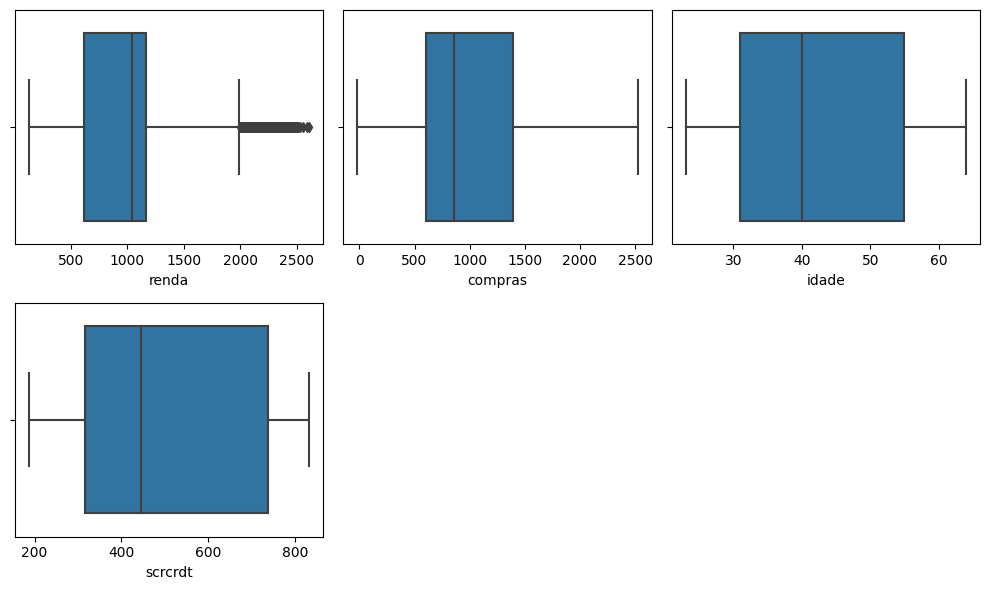

In [ ]:
# Gráfico dos BoxPlot para colocar no PowerPoint

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i, coluna in enumerate(list_columns):
    row = i // 3
    col = i % 3
    ax = axs[row, col]

    sns.boxplot(x=dados[coluna], ax=ax)
    ax.set_xlabel(coluna)

if len(list_columns) < 6:
    for i in range(len(list_columns), 6):
        fig.delaxes(axs[i // 3, i % 3])

plt.tight_layout()

In [ ]:
# Puxando os outliers da coluna renda para o limite superior (única variável que tem outlier)
dados.loc[dados.renda>=1988, 'renda']=1988

<ipython-input-27-0de49eb93b63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[dados.renda>=1988, 'renda']=1988


In [ ]:
# Limite inferior é de 129.444
# Primeiro quartil é de 614.558
# Terceiro quartil é de 1.165
# Limite superior é de 1.988
fig = px.box(dados, x="renda")
fig.show()

In [ ]:
# A coluna compras não tem outliers

# Limite inferior é de -20.076
# Primeiro quartil é de 603.690
# Terceiro quartil é de 1.395
# Limite superior é de 2.523
fig = px.box(dados, x="compras")
fig.show()

In [ ]:
# A coluna idade não tem outliers

# Limite inferior é de 23
# Primeiro quartil é de 31
# Terceiro quartil é de 55
# Limite superior é de 64
fig = px.box(dados, x="idade")
fig.show()

In [ ]:
# A coluna scrcrdt não tem outliers

# Limite inferior é de 187
# Primeiro quartil é de 315
# Terceiro quartil é de 737
# Limite superior é de 832
fig = px.box(dados, x="scrcrdt")
fig.show()

# Analise exploratória

## Estatísticas descritivas

In [ ]:
dados.describe().round(2)

,renda,compras,idade,scrcrdt,sexo
count,10262.00,10262.00,10262.00,10262.00,10262.00
mean,1012.94,1017.52,42.05,490.60,0.78
std,442.37,476.54,13.93,235.16,0.42
min,129.44,-20.08,23.00,187.00,0.00
25%,614.58,603.69,31.00,315.00,1.00
50%,1044.87,854.57,40.00,444.00,1.00
75%,1165.50,1395.79,55.00,737.00,1.00
max,1988.00,2523.87,64.00,832.00,1.00


* MÉDIA
 * Analisando o describe, vimos que a média das colunas são:
      * renda   - 1012.94
      * compras - 1017.52
      * idade   - 42.05
      * scrcrdt - 490.60
      * sexo    -  0.78 por ser uma variável binária

* DESVIO
 * Quando a coluna tem um desvio esse desvio é de:
      * renda   - 442.37
      * compras - 476.54
      * idade   - 13.93
      * scrcrdt - 235.16
      * sexo    - 0.42 por ser uma variável binária

* MEDIANA
 * A mediana de cada coluna é de:
      * renda   - 1044.87
      * compras - 854.57
      * idade   - 40.00
      * scrcrdt - 444.00
      * sexo    - 1.00 por ser uma variável binária

## Matriz de correlação

In [ ]:
dados.corr().round(4)

,renda,compras,idade,scrcrdt,sexo
renda,1.0000,0.2705,-0.7256,0.1089,-0.6487
compras,0.2705,1.0000,-0.4134,0.2206,-0.1700
idade,-0.7256,-0.4134,1.0000,0.0251,0.1230
scrcrdt,0.1089,0.2206,0.0251,1.0000,-0.0849
sexo,-0.6487,-0.1700,0.1230,-0.0849,1.0000


* As variáveis que tem uma correlação forte positiva são:
    * renda - compras, compras - scrcrdt
* As variáveis que tem uma correlação forte negativa são:
    * idade - renda, idade - compras, renda - sexo

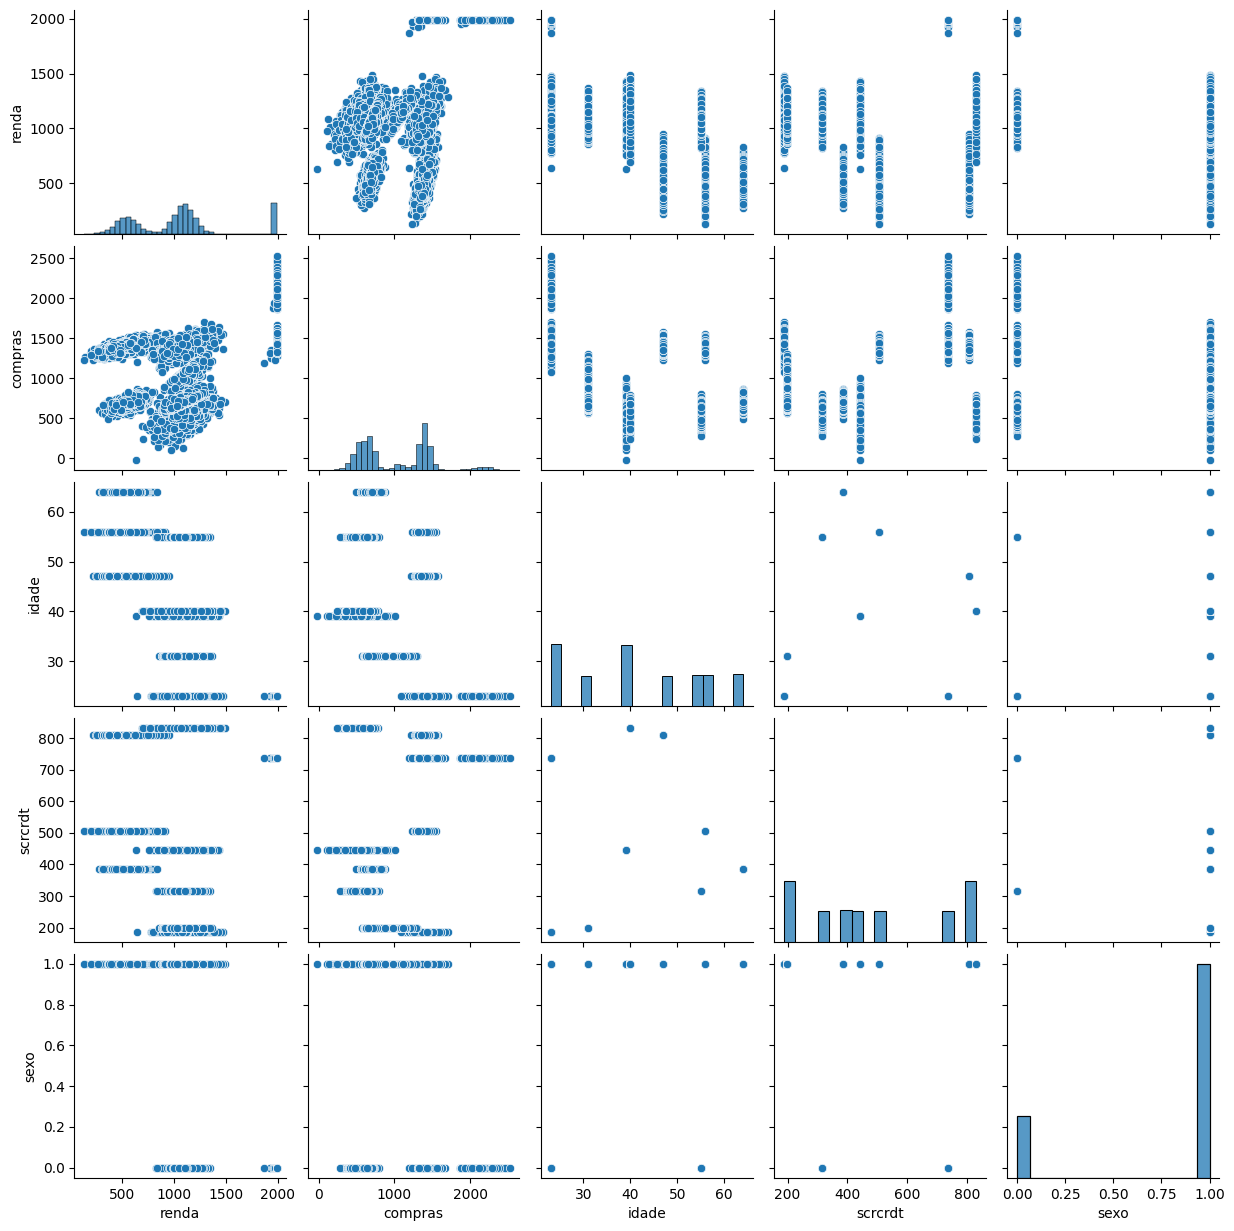

In [ ]:
# Analisando a correlação das variáveis através do gráfico de disperção
ax = sns.pairplot(dados)

## Analise de gráfico variável por variável

In [ ]:
dados

,renda,compras,idade,scrcrdt,sexo
2,503.748279,1365.005426,47.0,808.0,1.0
3,513.394265,1382.488822,47.0,808.0,1.0
4,581.371778,1461.492090,47.0,808.0,1.0
5,658.703820,1404.085790,47.0,808.0,1.0
6,681.185773,1415.946498,47.0,808.0,1.0
...,...,...,...,...,...
17378,1202.363473,1115.473862,31.0,198.0,1.0
17379,1093.341531,703.409077,31.0,198.0,1.0
17381,1037.866743,710.351726,31.0,198.0,1.0
17384,1025.357475,646.274528,31.0,198.0,1.0


### Renda

<ipython-input-36-691dc0c4ebb5>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='renda', ylabel='Density'>

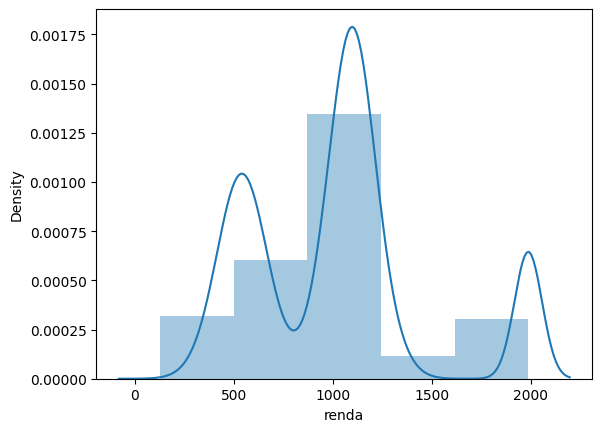

In [ ]:
# Tem um padrão de frequência nas classes
sns.distplot(dados['renda'], bins=5)

<Axes: xlabel='sexo', ylabel='renda'>

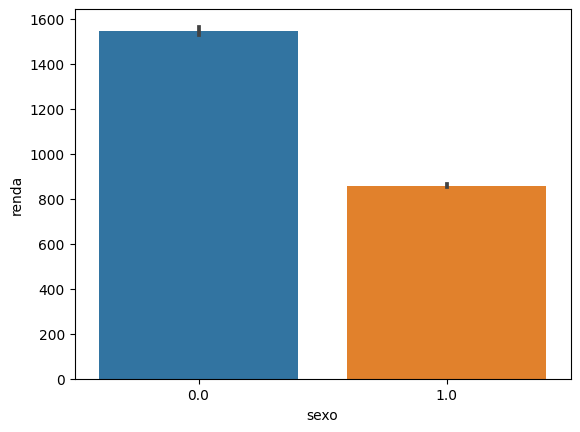

In [ ]:
# Percebemos que a renda das mulheres é maior do que a dos homens
sns.barplot(x='sexo', y='renda', data=dados)

### Compras

<ipython-input-38-76b67e3cca7c>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compras', ylabel='Density'>

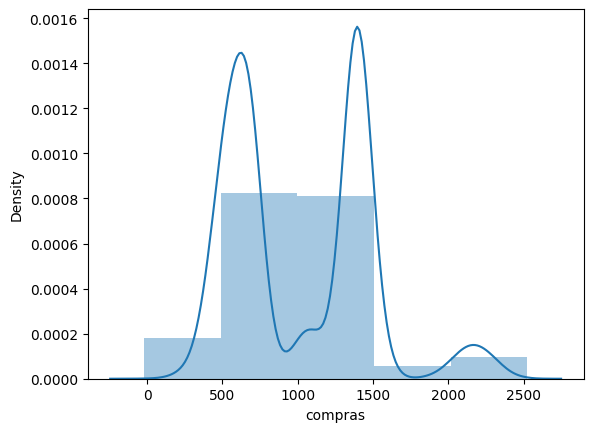

In [ ]:
# Tem uma variação de frequencia nas classes
sns.distplot(dados['compras'], bins=5)

### Idade

<ipython-input-39-f89ecdec94e9>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='idade', ylabel='Density'>

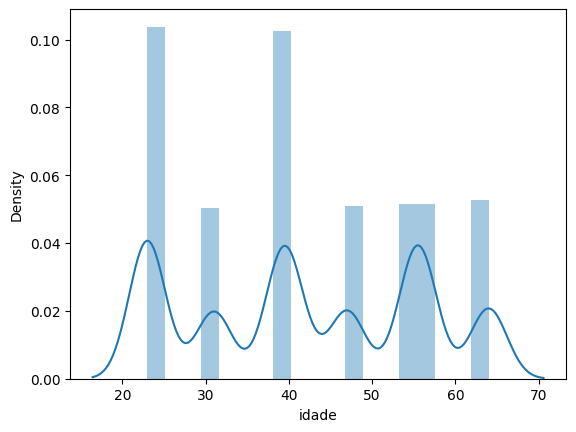

In [ ]:
# Tem um padrão de frequência nas classes e os dados estão uniforme
sns.distplot(dados['idade'])

<Axes: xlabel='idade', ylabel='renda'>

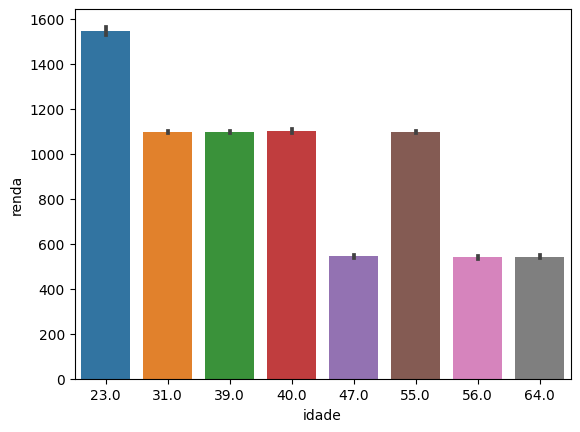

In [ ]:
# Vimos uma oportunidade de ver se quem era mais velho tinha uma renda maior ou menor e
# percebemos um padrão de quanto maior a idade menor a renda
sns.barplot(x='idade', y='renda', data=dados)

### scrcrdt

<ipython-input-41-efde44aca936>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='scrcrdt', ylabel='Density'>

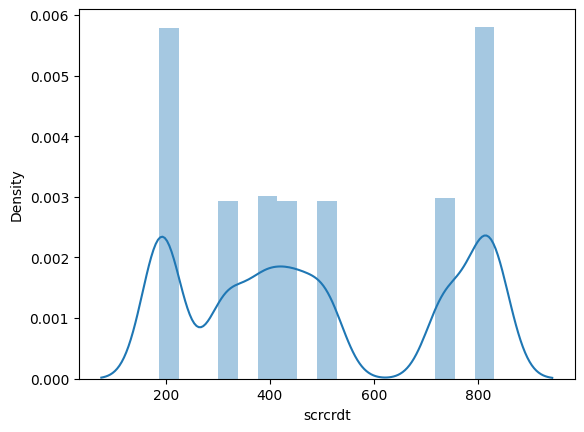

In [ ]:
# Tem uma variação de frequencia nas classes
sns.distplot(dados['scrcrdt'])

<Axes: xlabel='scrcrdt', ylabel='compras'>

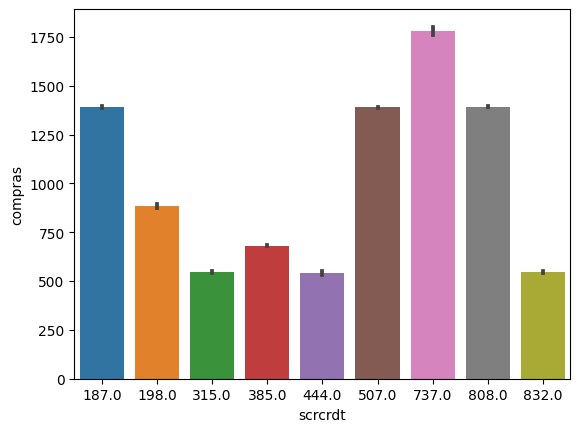

In [ ]:
# Imaginamos que quem tivesse o scrcrdt maior teria uma quantidade de compras maior.
sns.barplot(x='scrcrdt', y='compras', data=dados)

### Sexo

<Axes: >

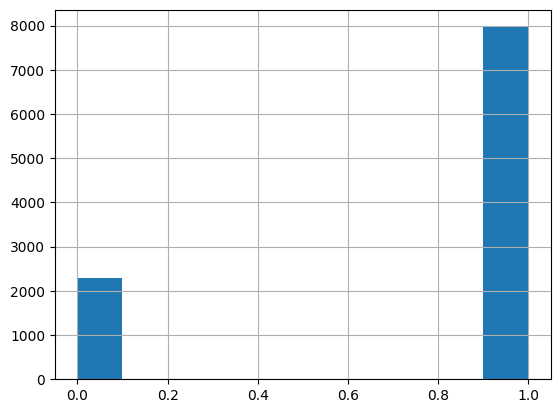

In [ ]:
dados['sexo'].hist()

In [ ]:
# Fórmula para saber a porcentagem de dados que tem em cada classe da variável binária
sexo_zero = len(dados.query('sexo == 0')) * 100 /  len(dados)
print(f'{sexo_zero:.2f}% dos clientes são femininos e {(abs(100-sexo_zero)):.2f}% são masculinos')

22.42% dos clientes são femininos e 77.58% são masculinos


# Modelos

## Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

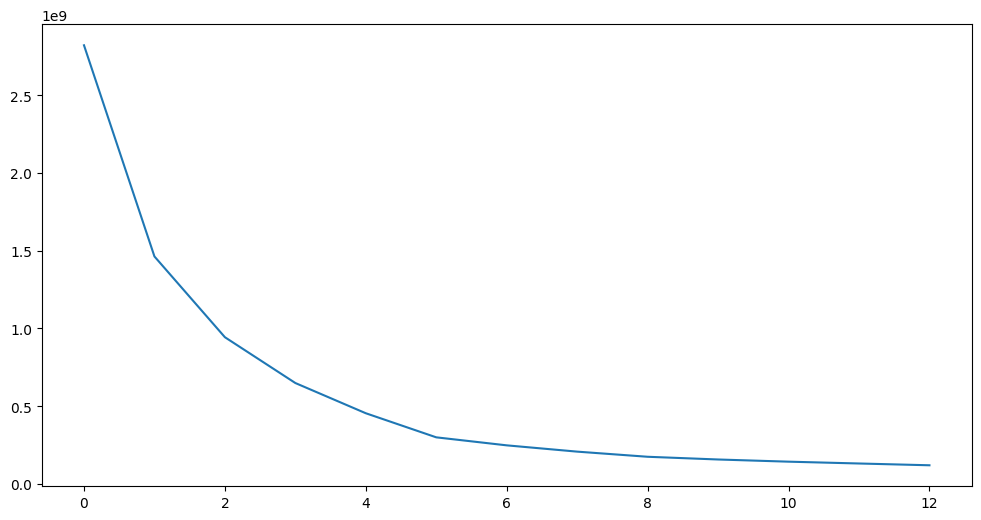

In [ ]:
wcss_scores = []
iterations = list(range(2,15))

for k in iterations:

    model = KMeans(n_clusters=k)
    model.fit(dados)
    wcss_scores.append(model.inertia_)
# Plot performances
plt.figure(figsize=(12,6))
sns.lineplot(wcss_scores)

In [ ]:
dados.columns

Index(['renda', 'compras', 'idade', 'scrcrdt', 'sexo'], dtype='object')

### compras - renda

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-47-699b149fb73e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-47-699b149fb73e>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

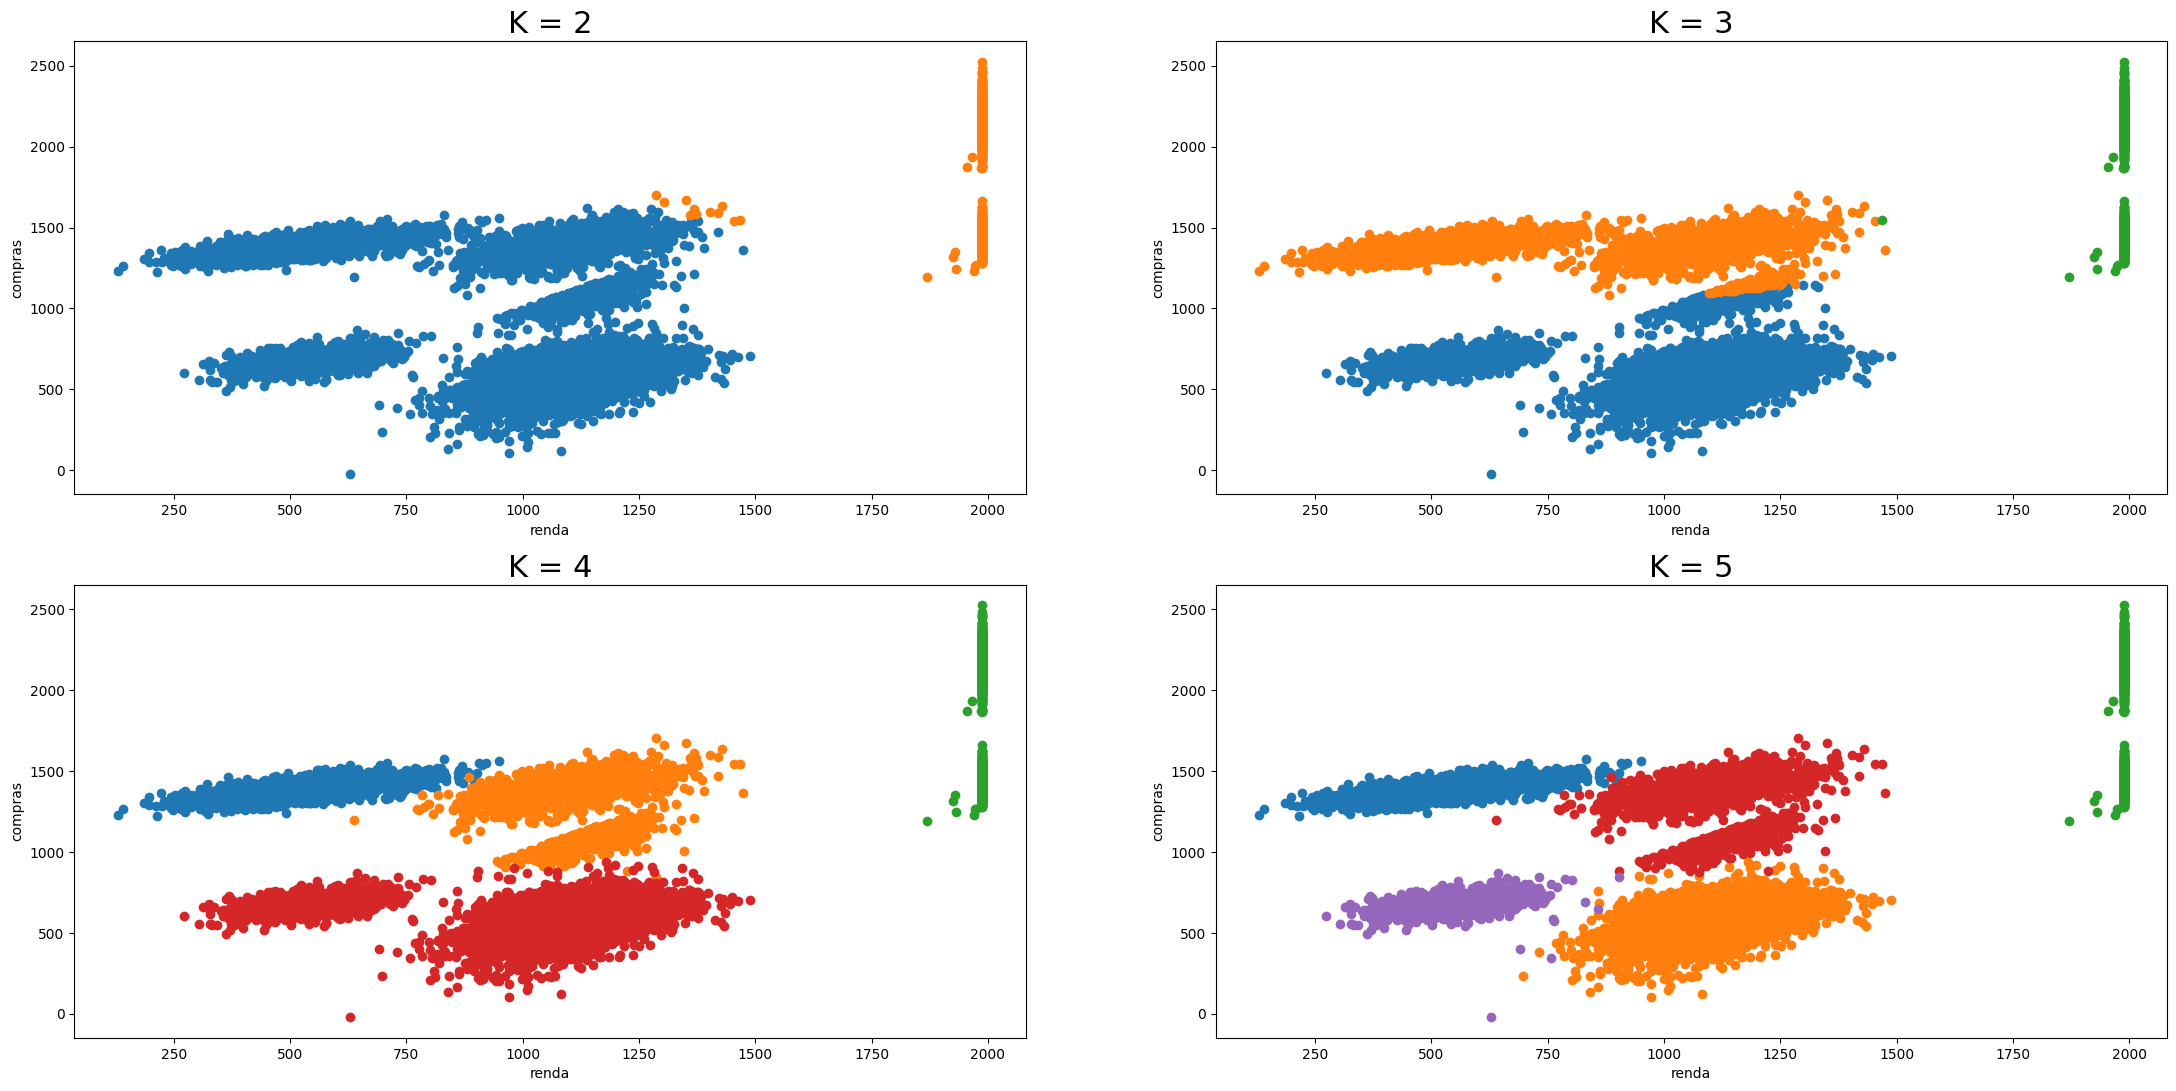

In [ ]:
# Visualise the clusters, considering Income and Spending
plt.figure(figsize=(27,20)) #tamanho da figura geral: largura e altura

plt.subplot(3,2,1) # quero que os graficos dentro da figura geral tenham 3 linhas, duas colunas e vou configurar a posicao 1
plt.title('K = 2',fontsize=22) # titulo e tamanho da fonte
plt.xlabel('renda') # nome no eixo x
plt.ylabel('compras') # segundo nome do eixo x
model = KMeans(n_clusters=2) # definindo o modelo com 2 clusters
dados['labels'] = model.fit_predict(dados) # criando a variável rótulo
plt.scatter(dados.renda[dados.labels == 0], dados.compras[dados.labels == 0]) # quero printar no grafico a variavel gasto onde o rótulo é 0 no eixo x e onde a renda é zero no eixo y
plt.scatter(dados.renda[dados.labels == 1], dados.compras[dados.labels == 1]) # quero printar no grafico a variavel gasto onde o rótulo é 1

plt.subplot(3,2,2) # mesma coisa que o anterior, porém, configurando a posição 2
plt.title('K = 3',fontsize=22)
plt.xlabel('renda')
plt.ylabel('compras')
model = KMeans(n_clusters=3)
dados['labels'] = model.fit_predict(dados)
plt.scatter(dados.renda[dados.labels == 0], dados.compras[dados.labels == 0])
plt.scatter(dados.renda[dados.labels == 1], dados.compras[dados.labels == 1])
plt.scatter(dados.renda[dados.labels == 2], dados.compras[dados.labels == 2]) # quero agora colocar no grafico 

plt.subplot(3, 2, 3)
plt.title('K = 4', fontsize=22)
plt.xlabel('renda')
plt.ylabel('compras')
model = KMeans(n_clusters=4)
dados['labels'] = model.fit_predict(dados)
plt.scatter(dados.renda[dados.labels == 0], dados.compras[dados.labels == 0])
plt.scatter(dados.renda[dados.labels == 1], dados.compras[dados.labels == 1])
plt.scatter(dados.renda[dados.labels == 2], dados.compras[dados.labels == 2])
plt.scatter(dados.renda[dados.labels == 3], dados.compras[dados.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5', fontsize=22)
plt.xlabel('renda')
plt.ylabel('compras')
model = KMeans(n_clusters=5)
dados['labels'] = model.fit_predict(dados)
plt.scatter(dados.renda[dados.labels == 0], dados.compras[dados.labels == 0])
plt.scatter(dados.renda[dados.labels == 1], dados.compras[dados.labels == 1])
plt.scatter(dados.renda[dados.labels == 2], dados.compras[dados.labels == 2])
plt.scatter(dados.renda[dados.labels == 3], dados.compras[dados.labels == 3])
plt.scatter(dados.renda[dados.labels == 4], dados.compras[dados.labels == 4])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-48-bf1a068bf5aa>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



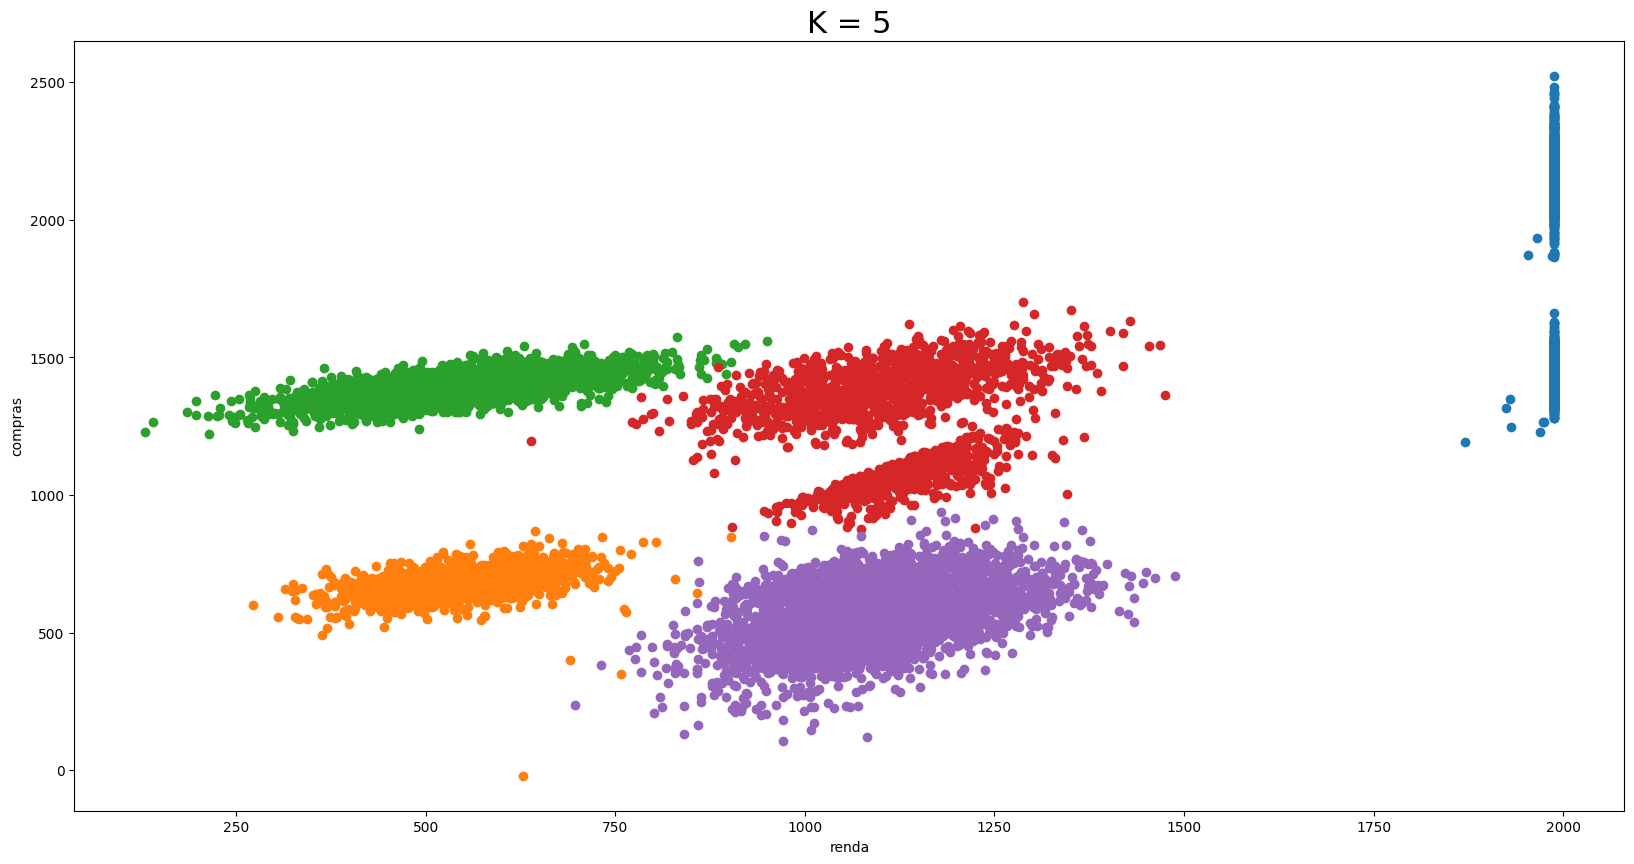

In [ ]:
# plt.subplot(3, 2, 4)

plt.figure(figsize=(20,10))
plt.title('K = 5', fontsize=22)
plt.xlabel('renda')
plt.ylabel('compras')
model = KMeans(n_clusters=5)
dados['labels'] = model.fit_predict(dados)
plt.scatter(dados.renda[dados.labels == 0], dados.compras[dados.labels == 0])
plt.scatter(dados.renda[dados.labels == 1], dados.compras[dados.labels == 1])
plt.scatter(dados.renda[dados.labels == 2], dados.compras[dados.labels == 2])
plt.scatter(dados.renda[dados.labels == 3], dados.compras[dados.labels == 3])
plt.scatter(dados.renda[dados.labels == 4], dados.compras[dados.labels == 4])

* Análise do gráfico:
  
  Temos 5 grupos interessentes
  
  O grupo vermelho são pessoas de baixa renda e gastadores médios

  O grupo laranja tem baixa renda e gasta pouco, é o pior grupo

  O grupo azul tem renda média e são gastadores médios

  O grupo roxo é composto por clientes que tem a renda média e gastam pouco

  O melhor grupo é o verde, que tem uma renda alta e gasta bastante

### scrcrdt - renda (não ficou legal)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-49-cf7f23119d93>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-49-cf7f23119d93>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

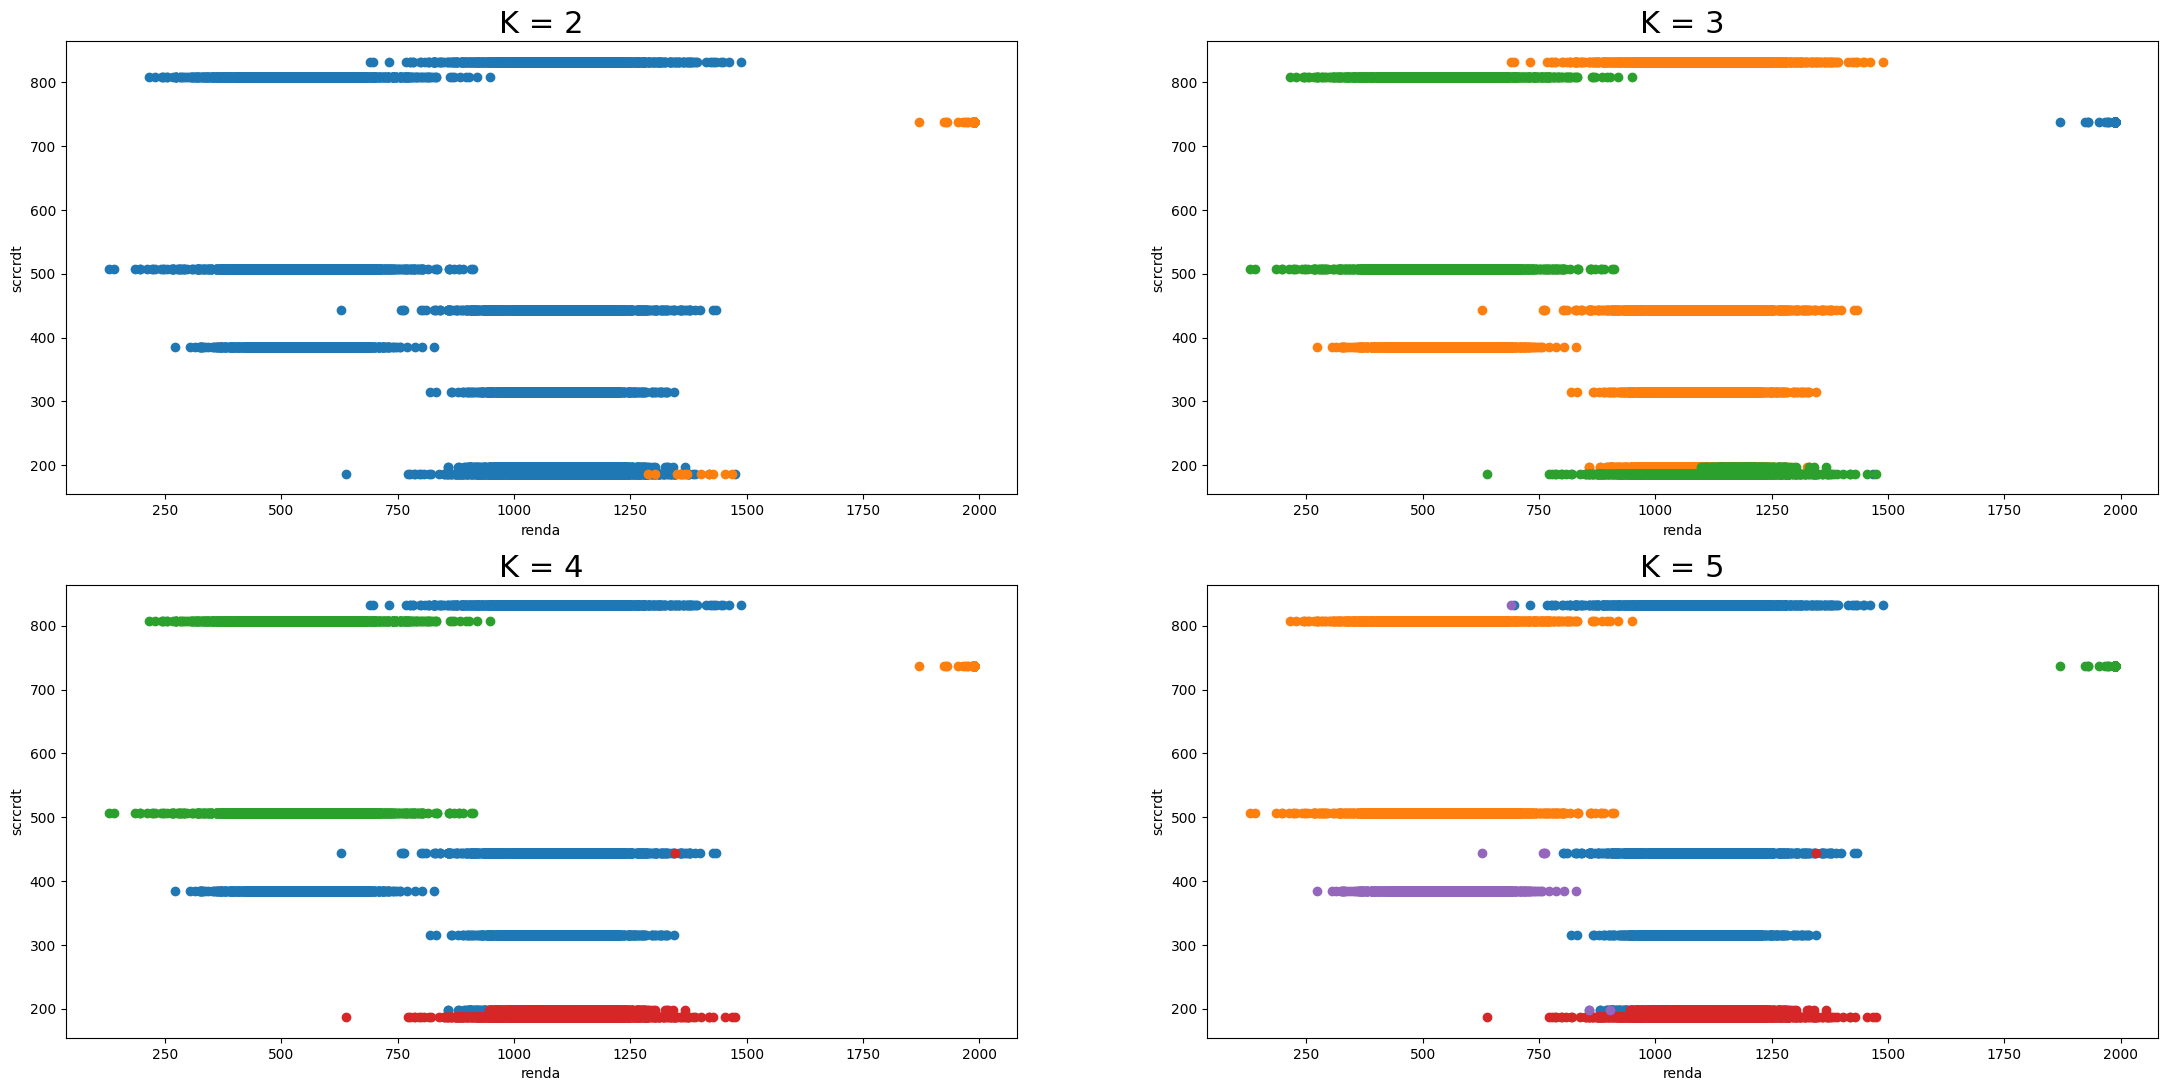

In [ ]:
# Visualise the clusters, considering Income and Spending
plt.figure(figsize=(27,20)) #tamanho da figura geral: largura e altura

plt.subplot(3,2,1) # quero que os graficos dentro da figura geral tenham 3 linhas, duas colunas e vou configurar a posicao 1
plt.title('K = 2',fontsize=22) # titulo e tamanho da fonte
plt.xlabel('renda') # nome no eixo x
plt.ylabel('scrcrdt') # segundo nome do eixo x
model = KMeans(n_clusters=2) # definindo o modelo com 2 clusters
dados['labels'] = model.fit_predict(dados) # criando a variável rótulo
plt.scatter(dados.renda[dados.labels == 0], dados.scrcrdt[dados.labels == 0]) # quero printar no grafico a variavel gasto onde o rótulo é 0 no eixo x e onde a renda é zero no eixo y
plt.scatter(dados.renda[dados.labels == 1], dados.scrcrdt[dados.labels == 1]) # quero printar no grafico a variavel gasto onde o rótulo é 1

plt.subplot(3,2,2) # mesma coisa que o anterior, porém, configurando a posição 2
plt.title('K = 3',fontsize=22)
plt.xlabel('renda')
plt.ylabel('scrcrdt')
model = KMeans(n_clusters=3)
dados['labels'] = model.fit_predict(dados)
plt.scatter(dados.renda[dados.labels == 0], dados.scrcrdt[dados.labels == 0])
plt.scatter(dados.renda[dados.labels == 1], dados.scrcrdt[dados.labels == 1])
plt.scatter(dados.renda[dados.labels == 2], dados.scrcrdt[dados.labels == 2]) # quero agora colocar no grafico 

plt.subplot(3, 2, 3)
plt.title('K = 4', fontsize=22)
plt.xlabel('renda')
plt.ylabel('scrcrdt')
model = KMeans(n_clusters=4)
dados['labels'] = model.fit_predict(dados)
plt.scatter(dados.renda[dados.labels == 0], dados.scrcrdt[dados.labels == 0])
plt.scatter(dados.renda[dados.labels == 1], dados.scrcrdt[dados.labels == 1])
plt.scatter(dados.renda[dados.labels == 2], dados.scrcrdt[dados.labels == 2])
plt.scatter(dados.renda[dados.labels == 3], dados.scrcrdt[dados.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5', fontsize=22)
plt.xlabel('renda')
plt.ylabel('scrcrdt')
model = KMeans(n_clusters=5)
dados['labels'] = model.fit_predict(dados)
plt.scatter(dados.renda[dados.labels == 0], dados.scrcrdt[dados.labels == 0])
plt.scatter(dados.renda[dados.labels == 1], dados.scrcrdt[dados.labels == 1])
plt.scatter(dados.renda[dados.labels == 2], dados.scrcrdt[dados.labels == 2])
plt.scatter(dados.renda[dados.labels == 3], dados.scrcrdt[dados.labels == 3])
plt.scatter(dados.renda[dados.labels == 4], dados.scrcrdt[dados.labels == 4])

## DBScan

In [ ]:
dados.columns

Index(['renda', 'compras', 'idade', 'scrcrdt', 'sexo', 'labels'], dtype='object')

In [ ]:
# escolhendo as variáveis que vamos treinar o modelo
X = dados[['renda',	'compras', 'idade']]

In [ ]:
# criando o modelo 
modelo = DBSCAN(eps=25, min_samples=25).fit(X)

In [ ]:
dados['predito']=modelo.fit_predict(X)

<ipython-input-53-ef05e1e9f4ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
t = dados['predito'].value_counts()
t

 1    3448
 0    2109
-1    1456
 2    1029
 5     697
 3     597
 4     507
 6     419
Name: predito, dtype: int64

In [ ]:
clusters = len(dados.predito.unique())

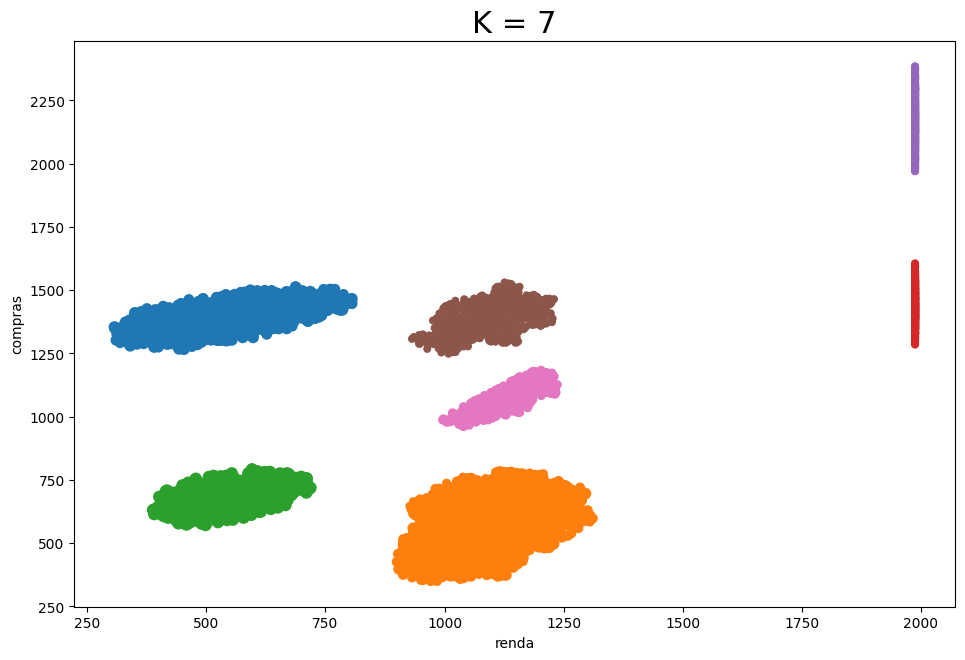

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(3,2,1)
plt.xlabel('renda')
plt.ylabel('compras')

for i in range(0, clusters):
    plt.title('K = '+str(i)+'', fontsize=22)
    plt.scatter(dados.renda[dados.predito == i], dados.compras[dados.predito == i], dados.idade[dados.predito == i])

In [ ]:
dados

,renda,compras,idade,scrcrdt,sexo,labels,predito
2,503.748279,1365.005426,47.0,808.0,1.0,1,0
3,513.394265,1382.488822,47.0,808.0,1.0,1,0
4,581.371778,1461.492090,47.0,808.0,1.0,1,0
5,658.703820,1404.085790,47.0,808.0,1.0,1,0
6,681.185773,1415.946498,47.0,808.0,1.0,1,0
...,...,...,...,...,...,...,...
17378,1202.363473,1115.473862,31.0,198.0,1.0,3,6
17379,1093.341531,703.409077,31.0,198.0,1.0,0,1
17381,1037.866743,710.351726,31.0,198.0,1.0,0,1
17384,1025.357475,646.274528,31.0,198.0,1.0,0,1
